# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import BacktestManager
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'

# Universe

In [3]:
PM.review('universe')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [4]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [5]:
WidgetUniverse

## WTR

In [6]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'daily': True,
 'path': 'data'}

In [7]:
file = 'bt_etfs_weather_240611' # data for backtesting
wtr = PM.create_universe('UV_WTR', file=file)

10 securities from 2002-10-14 to 2024-06-11 uploaded.
df_prices loaded


In [8]:
kw = dict(
    n_years=20, 
    close_today = WidgetUniverse.values(1),
    tickers='selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

In [9]:
df_wtr = wtr.df_prices
names_wtr = wtr.get_names()
wtr.get_date_range()

,name,start date,end date,n
069500,KODEX 200,2002-10-14,2024-06-11,5354
148070,KOSEF 국고채10년,2011-10-20,2024-06-11,3113
261220,KODEX WTI원유선물(H),2016-12-27,2024-06-11,1831
273130,KODEX 종합채권(AA-이상)액티브,2017-06-29,2024-06-11,1708
284430,KODEX 200미국채혼합,2017-11-30,2024-06-11,1605
305080,TIGER 미국채10년선물,2018-08-30,2024-06-11,1422
304660,KODEX 미국30년국채울트라선물(H),2018-09-12,2024-06-11,1413
379800,KODEX 미국S&P500TR,2021-04-09,2024-06-11,781
411060,ACE KRX금현물,2021-12-15,2024-06-11,611
453850,ACE 미국30년국채액티브(H),2023-03-14,2024-06-11,305


## FCTR

In [10]:
PM.review_universe('UV_FCTR')

{'universe': 'yahoo',
 'file': 'etfs_factors',
 'tickers': None,
 'daily': True,
 'path': 'data'}

In [11]:
file = 'bt_etfs_factors_241018' # data for backtesting
fctr = PM.create_universe('UV_FCTR', file=file)

7 securities from 1993-01-29 to 2024-10-18 uploaded.
ERROR: Set tickers for names
ERROR: Failed to get ticker names
df_prices loaded


In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

In [13]:
df_fctr = fctr.df_prices
tickers = df_fctr.columns
names_fctr = fctr.get_names(tickers)
fctr.get_date_range()

,name,start date,end date,n
SPY,SPDR S&P 500 ETF Trust,1993-01-29,2024-10-18,7988
USMV,iShares MSCI USA Min Vol Factor ETF,2011-10-20,2024-10-18,3270
MTUM,iShares MSCI USA Momentum Factor ETF,2013-04-18,2024-10-18,2897
SIZE,iShares MSCI USA Size Factor ETF,2013-04-18,2024-10-18,2897
VLUE,iShares MSCI USA Value Factor ETF,2013-04-18,2024-10-18,2897
QUAL,iShares MSCI USA Quality Factor ETF,2013-07-18,2024-10-18,2834
LRGF,iShares U.S. Equity Factor ETF,2015-04-30,2024-10-18,2385


## FUND

In [6]:
PM.review_universe('UV_FUND')

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'daily': False,
 'path': 'data'}

In [7]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2024-10-31 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
df_prices loaded


In [8]:
df_fund = fund.df_prices
names_fund = fund.get_names()
fund.get_date_range().sort_values('end date')

,name,start date,end date,n
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),2008-11-28,2024-10-31,5817
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2017-09-29,2024-10-31,2590
K55301BU5453,미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e,2017-10-31,2024-10-31,2558
K55303BT4176,마이다스아시아리더스성장주연금증권자투자신탁(UH)(주식)C-Pe2,2017-11-30,2024-10-31,2528
K55234BY9966,IBK베트남플러스아시아증권투자신탁[주식]종류C-Re,2017-12-29,2024-10-31,2499
...,...,...,...,...
K55101BT7397,한국투자TDF알아서2040증권투자신탁(주식혼합-재간접형)(C-Re),2017-08-31,2024-10-31,2619
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,2017-08-31,2024-10-31,2619
K55207BU0715,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe,2017-08-31,2024-10-31,2619
K55234DF2657,IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re,2021-04-30,2024-10-31,1281


In [9]:
#fund.performance('sharpe', 'year')
#fund.performance(['cagr', 'monthly_sharpe'], 'cagr')
fund.performance(['cagr', 'yearly_sharpe'], 'yearly_sharpe')

,name,cagr,yearly_sharpe
K55101BT4444,한국투자TDF알아서2045증권투자신탁(주식혼합-재간접형)(C-Re),0.142402,193.418168
K55301BM7640,미래에셋전략배분TDF2035혼합자산자투자신탁 종류C-Pe,0.152586,106.050897
K55301D51370,미래에셋전략배분TDF2050혼합자산자투자신탁종류C-P2e,0.174227,102.782741
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,0.152279,100.82955
K55301BU5479,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e,0.168456,84.821526
...,...,...,...
K55105BH1010,삼성클래식아세안연금증권전환형자투자신탁 1[주식]_Ce,0.180439,0.929645
K55235BW6799,피델리티아시아증권자투자신탁(주식)CP-e,0.078651,0.906315
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,0.044525,0.669178
K55203C53681,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe,0.131451,0.604373


# Parameter Study

## WTR
*modified all weather*

In [18]:
selected = ['069500', '273130', '148070', '379800', '411060', '284430']
wtr.get_date_range().loc[selected]

,name,start date,end date,n
069500,KODEX 200,2002-10-14,2024-06-11,5354
273130,KODEX 종합채권(AA-이상)액티브,2017-06-29,2024-06-11,1708
148070,KOSEF 국고채10년,2011-10-20,2024-06-11,3113
379800,KODEX 미국S&P500TR,2021-04-09,2024-06-11,781
411060,ACE KRX금현물,2021-12-15,2024-06-11,611
284430,KODEX 200미국채혼합,2017-11-30,2024-06-11,1605


In [19]:
df_train = df_wtr

In [20]:
kwargs_bm = dict(
    initial_capital = 1e8,
    commissions = 0,
    days_in_year = 245,
    security_names = names_wtr
)

### Equal Weight

#### Cross-validate

In [90]:
from itertools import product

p_args = dict(
    p_freq = ['1m', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'WTR:f{x[0]}', 'freq':x[0]} 
            for x in p_comb]
params[0]

{'name': 'WTR:f1m', 'freq': '1m'}

In [91]:
bm = BacktestManager(df_train, **kwargs_bm)

7 securities from 1993-01-29 to 2023-10-06 uploaded.
running self.util_check_days_in_year to check days in a year


In [92]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

3 jobs prepared for cross-validation


In [25]:
bm.cross_validate(n_sample=100)

Cross-validating 3 strategies: WTR:f1m, WTR:f6m, WTR:f1y


100%|███████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 24.16it/s]


15.8 secs elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [26]:
file = 'param_weather_equal.csv'

*Save param study*

In [27]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_weather_equal.csv saved
3 param sets with 80 iterations per set


*Load param study*

In [27]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_weather_equal.csv
3 param sets with 17 iterations per set


In [28]:
y = 'cagr'
#y = 'monthly_sharpe'
ref_val = 's&p500'

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2021-12-14 to 2024-06-10


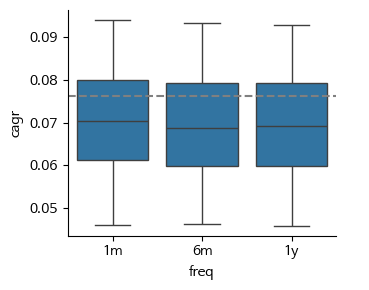

In [29]:
kw = {'x':'freq', 'kind':'box'}
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=1.2, **kw)

### All Combinations

#### Cross-validate

In [30]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    #p_lookback = ['6m', '1y'],
    p_freq = ['1q', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'WTR:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]
params[0]

{'name': 'WTR:equally/lb1q/f1q',
 'weigh': 'equally',
 'lookback': '1q',
 'freq': '1q'}

In [31]:
bm = BacktestManager(df_train, **kwargs_bm)

10 securities from 2002-10-14 to 2024-06-11 uploaded.
running self.util_check_days_in_year to check days in a year


In [32]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

12 jobs prepared for cross-validation


In [33]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=100, **kw_batch)

Cross-validating 12 strategies: WTR:equally/lb1q/f1q, WTR:equally/lb6m/f6m, ... , WTR:invvol/lb1y/f1y


100%|███████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 28.06it/s]


1.0 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [34]:
file = 'param_weather.csv'

*Save param study*

In [35]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_weather.csv saved
12 param sets with 77 iterations per set


*Load param study*

In [43]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_weather.csv
12 param sets with 83 iterations per set


In [36]:
y = 'cagr'
#y = 'monthly_sharpe'
ref_val = 's&p500'

*optimized: weigh **meanvar** & freq/lookback **6m***

[*********************100%***********************]  1 of 1 completed


Returning cagr of s&p500 from 2021-12-14 to 2024-06-10


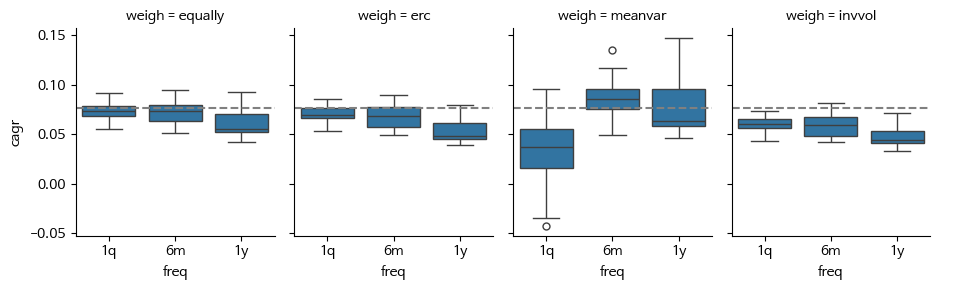

In [37]:
#kw = {'row':'lookback', 'x':'freq', 'col':'weigh'}

# data size seems small as result of equal weight differs depending on lookback length
kw = {'x':'freq', 'col':'weigh', 'kind':'box'} 

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [21]:
n_val = 500
df_val = df_wtr.iloc[-n_val:]

In [22]:
bm = BacktestManager(df_val, **kwargs_bm)

10 securities from 2022-05-30 to 2024-06-11 uploaded.
running self.util_check_days_in_year to check days in a year


In [23]:
# weigh, lookback/freq
p_comb = [
    ['meanvar', '6m'], ['meanvar', '1q'], ['equally', '6m']
]

kwa_list = [{'name':f'WTR:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]

In [24]:
kwargs_build = dict(
    select='all'
)
bm.build_batch(*kwa_list, **kwargs_build)

In [25]:
bm.benchmark(name='s&p500(1)', ticker='s&p500', lookback='1q')
bm.benchmark(name='s&p500(2)', ticker='s&p500', lookback='6m')
bm.benchmark(name='s&p500(3)', ticker='s&p500', lookback='1y')
#bm.benchmark(name='kodex200')

REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods


Backtesting 6 strategies: WTR:meanvar/lb6m/f6m, WTR:meanvar/lb1q/f1q, ... , s&p500(3)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 32.01it/s]


Returning stats


,s&p500(1),s&p500(2),WTR:meanvar/lb6m/f6m,WTR:meanvar/lb1q/f1q,WTR:equally/lb6m/f6m,s&p500(3)
start,2023-03-13,2023-03-13,2023-03-13,2023-03-13,2023-03-13,2023-03-13
end,2024-06-10,2024-06-10,2024-06-10,2024-06-10,2024-06-10,2024-06-10
total_return,0.225992,0.189937,0.165698,0.095044,0.059587,0.040832
cagr,0.177696,0.149812,0.130972,0.075607,0.047558,0.032648
calmar,1.729179,1.740695,2.904553,0.976695,0.963664,0.597478
max_drawdown,-0.102763,-0.086064,-0.045092,-0.077411,-0.049352,-0.054642
avg_drawdown,-0.014345,-0.013497,-0.008193,-0.021197,-0.016326,-0.017165
avg_drawdown_days,11.0,8.545455,9.65,32.3,32.285714,14.2
daily_vol,0.102755,0.090128,0.059018,0.086884,0.054722,0.047266
daily_sharpe,1.745612,1.693586,2.249155,0.93605,0.930954,0.74689


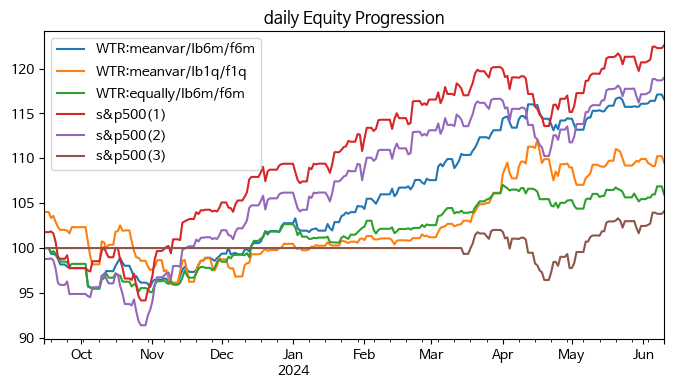

In [26]:
bm.run(stats_sort_by='cagr', figsize=(8,4))

## FCTR

### All Factors

In [29]:
selected = ['MTUM','QUAL','SIZE','USMV','VLUE']
fctr.get_date_range().loc[selected]

,name,start date,end date,n
MTUM,iShares MSCI USA Momentum Factor ETF,2013-04-18,2024-10-18,2897
QUAL,iShares MSCI USA Quality Factor ETF,2013-07-18,2024-10-18,2834
SIZE,iShares MSCI USA Size Factor ETF,2013-04-18,2024-10-18,2897
USMV,iShares MSCI USA Min Vol Factor ETF,2011-10-20,2024-10-18,3270
VLUE,iShares MSCI USA Value Factor ETF,2013-04-18,2024-10-18,2897


In [30]:
n_val = 260
n_lb = 260
df = df_fctr
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [31]:
kwargs_bm = dict(
    initial_capital = 1e5, # USD
    commissions = 0,
    days_in_year = 252,
    security_names = names_fctr
)

#### Cross-validate

In [58]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    #p_lookback = ['1q', '6m', '1y'],
    p_freq = ['1q', '6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'FCTR:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]
params[0]

{'name': 'FCTR:equally/lb1q/f1q',
 'weigh': 'equally',
 'lookback': '1q',
 'freq': '1q'}

In [59]:
bm = BacktestManager(df_train, **kwargs_bm)

7 securities from 1993-01-29 to 2023-10-06 uploaded.
running self.util_check_days_in_year to check days in a year


In [61]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

12 jobs prepared for cross-validation


In [63]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=100, **kw_batch)

Cross-validating 12 strategies: FCTR:equally/lb1q/f1q, FCTR:equally/lb6m/f6m, ... , FCTR:invvol/lb1y/f1y


100%|███████████████████████████████████████████████████████████████| 84/84 [00:12<00:00,  6.56it/s]


4.0 mins elapsed, 0.0 secs paused (0.0%)


In [ ]:
#bm.cross_validate(n_sample=20)

#### Visualize

In [39]:
file = 'param_factor_ishares5.csv'

*Save param study*

In [65]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_factor_ishares5.csv saved
12 param sets with 84 iterations per set


*Load param study*

In [40]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_factor_ishares5.csv
12 param sets with 84 iterations per set


In [57]:
y = 'cagr'
ref_val = 's&p500'

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2013-07-17 to 2023-10-05


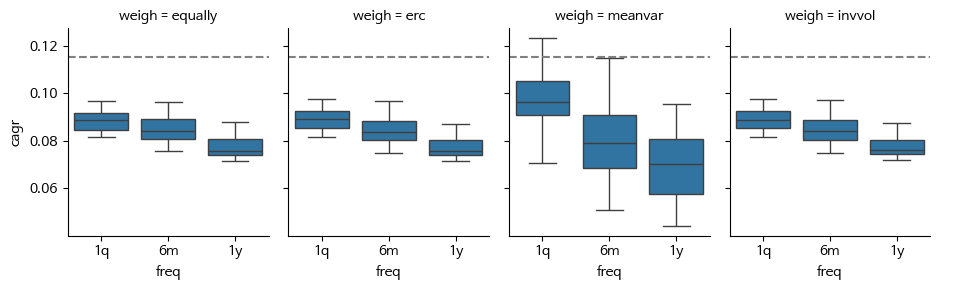

In [58]:
#kw = {'row':'lookback', 'x':'freq', 'col':'weigh'}
kw = {'x':'freq', 'col':'weigh', 'kind':'box'} 

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

[*********************100%***********************]  1 of 1 completed

Returning cagr of LRGF from 2015-04-30 to 2023-10-05


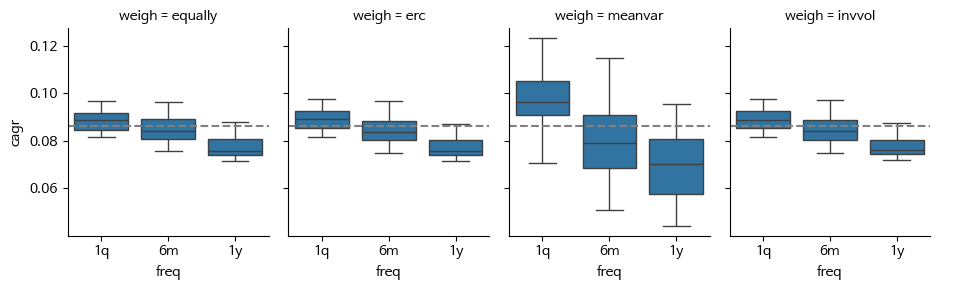

In [59]:
ref_val = ('LRGF', 'yahoo')
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of LRGF from 2015-04-30 to 2023-10-05


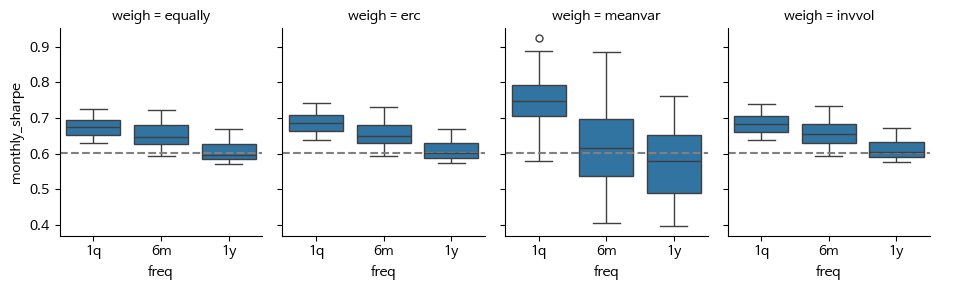

In [60]:
y = 'monthly_sharpe'
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [32]:
bm = BacktestManager(df_val, **kwargs_bm)

7 securities from 2022-09-26 to 2024-10-18 uploaded.
running self.util_check_days_in_year to check days in a year


In [33]:
# weigh, lookback, freq
p_comb = [['meanvar', '1q'], ['equally', '1q'], ['meanvar', '6m']]
kwa_list = [{'name':f'FCTR:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]

In [34]:
selected

['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE']

In [35]:
kwargs_build = dict(
    select=selected
)
bm.build_batch(*kwa_list, **kwargs_build)

In [36]:
bm.benchmark(name='s&p500(1)', ticker='s&p500', lookback='1q')
bm.benchmark(name='s&p500(2)', ticker='s&p500', lookback='6m')
bm.benchmark('LRGF', lookback='1q')

REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods


Backtesting 6 strategies: FCTR:meanvar/lb1q/f1q, FCTR:equally/lb1q/f1q, ... , LRGF


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 22.02it/s]


Returning stats


,LRGF,FCTR:meanvar/lb6m/f6m,s&p500(1),s&p500(2),FCTR:equally/lb1q/f1q,FCTR:meanvar/lb1q/f1q
start,2022-09-25,2022-09-25,2022-09-25,2022-09-25,2022-09-25,2022-09-25
end,2024-10-17,2024-10-17,2024-10-17,2024-10-17,2024-10-17,2024-10-17
total_return,0.581104,0.533239,0.523177,0.465985,0.406291,0.359417
cagr,0.248843,0.230359,0.226436,0.203879,0.179846,0.160604
calmar,2.602834,2.729998,2.211526,1.993624,1.94652,1.721839
max_drawdown,-0.095604,-0.084381,-0.102389,-0.102265,-0.092394,-0.093275
avg_drawdown,-0.014566,-0.013653,-0.013993,-0.013014,-0.015732,-0.016141
avg_drawdown_days,11.909091,9.795455,10.833333,9.733333,13.575,15.108108
daily_vol,0.125128,0.106447,0.120307,0.105543,0.113153,0.118076
daily_sharpe,1.840926,2.00333,1.759039,1.813145,1.520021,1.321968


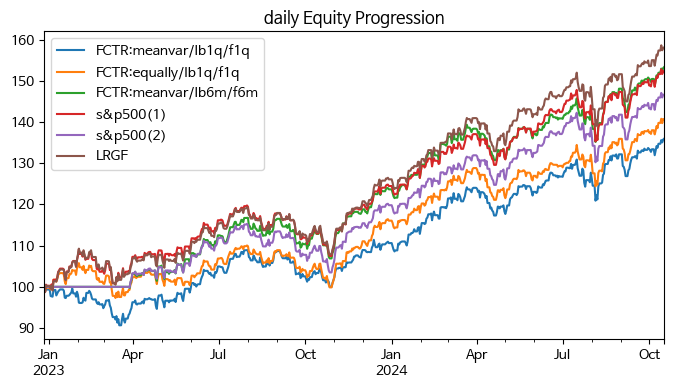

In [37]:
bm.run(stats_sort_by='cagr', figsize=(8,4))

### Selected

In [76]:
#selected = ['QUAL','SIZE','USMV','VLUE']
selected = ['QUAL','SIZE','VLUE']
fctr.get_date_range().loc[selected]

,name,start date,end date,n
QUAL,iShares MSCI USA Quality Factor ETF,2013-07-18,2024-10-18,2834
SIZE,iShares MSCI USA Size Factor ETF,2013-04-18,2024-10-18,2897
VLUE,iShares MSCI USA Value Factor ETF,2013-04-18,2024-10-18,2897


In [77]:
n_val = 260
n_lb = 260
df = df_fctr
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [78]:
kwargs_bm = dict(
    initial_capital = 1e5, # USD
    commissions = 0,
    days_in_year = 252,
    security_names = names_fctr
)

#### Cross-validate

In [79]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_freq = ['1q', '6m', '1y']
)

p_comb = list(product(*p_args.values()))
params = [{'name':f'FCTR:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]
params[0]

{'name': 'FCTR:equally/lb1q/f1q',
 'weigh': 'equally',
 'lookback': '1q',
 'freq': '1q'}

In [80]:
bm = BacktestManager(df_train, **kwargs_bm)

7 securities from 1993-01-29 to 2023-10-06 uploaded.
running self.util_check_days_in_year to check days in a year


In [81]:
selected

['QUAL', 'SIZE', 'VLUE']

In [82]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

12 jobs prepared for cross-validation


In [83]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=100, **kw_batch)

Cross-validating 12 strategies: FCTR:equally/lb1q/f1q, FCTR:equally/lb6m/f6m, ... , FCTR:invvol/lb1y/f1y


100%|███████████████████████████████████████████████████████████████| 84/84 [00:11<00:00,  7.55it/s]


3.5 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [84]:
#file = 'param_factor_ishares4.csv'
file = 'param_factor_ishares3.csv'

*Save param study*

In [85]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_factor_ishares3.csv saved
12 param sets with 84 iterations per set


*Load param study*

In [86]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_factor_ishares3.csv
12 param sets with 84 iterations per set


In [87]:
y = 'cagr'
ref_val = 's&p500'

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2013-07-17 to 2023-10-05


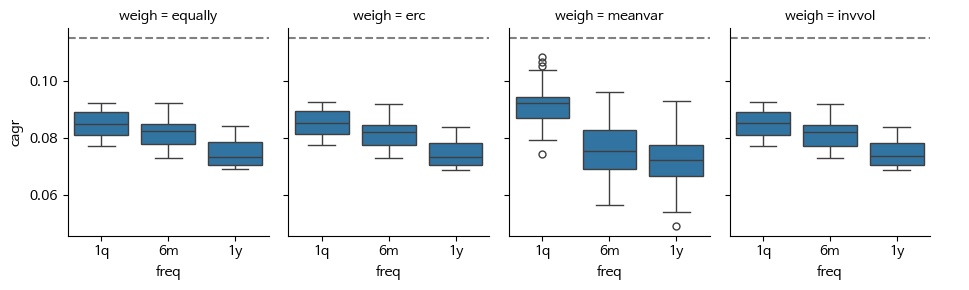

In [88]:
#kw = {'row':'lookback', 'x':'freq', 'col':'weigh'}
kw = {'x':'freq', 'col':'weigh', 'kind':'box'} 

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of s&p500 from 2013-07-17 to 2023-10-05


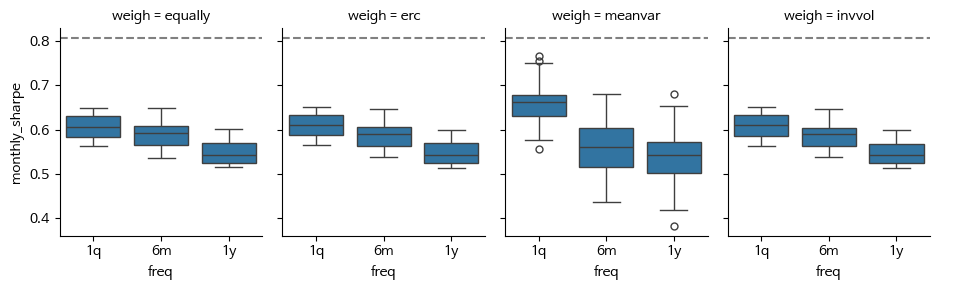

In [89]:
y = 'monthly_sharpe'
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

## TDF

In [10]:
keyword = 'tdf'
names = fund.get_names()
tickers = [k for k,v in names.items() if keyword in v.lower()]
df_tdf = df_fund[tickers]
len(tickers)

48

In [11]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    days_in_year = 365,
    security_names = names_fund
)

### Selected

In [22]:
df = fund.performance(['cagr', 'monthly_sharpe'])

In [23]:
metric = 'cagr'
selected = df.loc[df_tdf.columns].sort_values(metric, ascending=False).iloc[:5].index.to_list()

In [24]:
df.loc[selected]

,name,cagr,monthly_sharpe
K55234DF3317,IBK로우코스트TDF2055증권자투자신탁[혼합-재간접형]종류C-Re,0.200786,2.526401
K55234DF3150,IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re,0.191473,2.475409
K55210CO3828,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-re),0.189969,1.982037
K55223BT1922,KB온국민TDF2050증권자투자신탁(주식혼합-재간접형)(H)C-퇴직e,0.185566,1.891066
K55210BU2450,신한마음편한TDF2045증권투자신탁[주식혼합-재간접형](종류C-re),0.184453,1.961035


In [25]:
fund.get_date_range().loc[selected]

,name,start date,end date,n
K55234DF3317,IBK로우코스트TDF2055증권자투자신탁[혼합-재간접형]종류C-Re,2021-04-30,2024-10-31,1281
K55234DF3150,IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re,2021-04-30,2024-10-31,1281
K55210CO3828,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-re),2019-04-30,2024-10-31,2012
K55223BT1922,KB온국민TDF2050증권자투자신탁(주식혼합-재간접형)(H)C-퇴직e,2017-07-31,2024-10-31,2650
K55210BU2450,신한마음편한TDF2045증권투자신탁[주식혼합-재간접형](종류C-re),2017-08-31,2024-10-31,2619


In [26]:
df_train = df_tdf

#### Cross-validate

In [27]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_freq = ['6m', '1y', '2y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'TDF:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]
params[0]

{'name': 'TDF:equally/lb6m/f6m',
 'weigh': 'equally',
 'lookback': '6m',
 'freq': '6m'}

In [28]:
bm = BacktestManager(df_train, **kwargs_bm)

48 securities from 2008-11-28 to 2024-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [29]:
kwa_list = params
kwargs_build = dict(
    select=selected, reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

12 jobs prepared for cross-validation


In [30]:
bm.cross_validate(n_sample=100)

Cross-validating 12 strategies: TDF:equally/lb6m/f6m, TDF:equally/lb1y/f1y, ... , TDF:invvol/lb2y/f2y


100%|███████████████████████████████████████████████████████████████| 83/83 [00:03<00:00, 24.52it/s]


1.2 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [31]:
file = 'param_tdf_s1.csv'

*Save param study*

In [32]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_tdf_s1.csv saved
12 param sets with 83 iterations per set


*Load param study*

In [33]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_tdf_s1.csv
12 param sets with 83 iterations per set


In [34]:
y = 'cagr'
ref_val = 's&p500'

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2021-04-29 to 2024-10-30


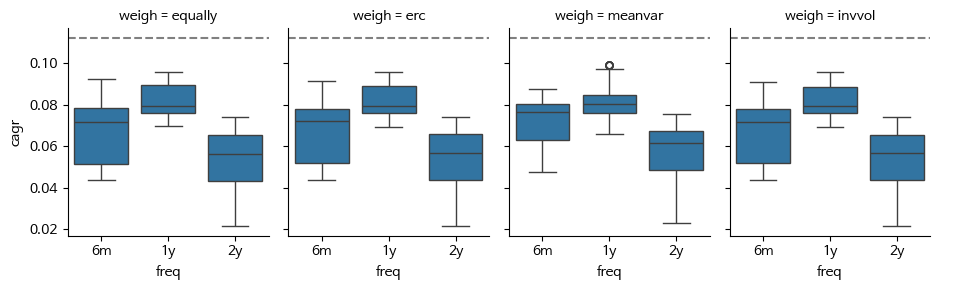

In [35]:
#kw = {'row':'lookback', 'x':'freq', 'col':'weigh'}
kw = {'x':'freq', 'col':'weigh', 'kind':'box'} 

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of s&p500 from 2021-04-29 to 2024-10-30


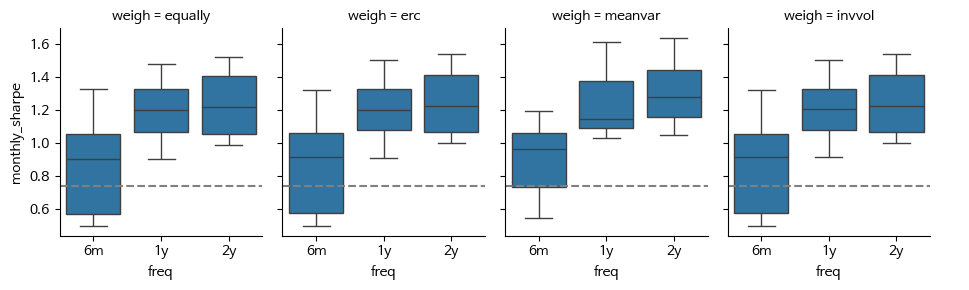

In [36]:
y = 'monthly_sharpe'
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [37]:
bm = BacktestManager(df_train, **kwargs_bm)

48 securities from 2008-11-28 to 2024-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [38]:
# weigh, freq
p_comb = [['equally', '1y'], ['equally', '2y']]
kwa_list = [{'name':f'FACTOR:{x[0]}/lb{x[1]}/f{x[1]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]

In [39]:
kwargs_build = dict(
    select=selected
)
bm.build_batch(*kwa_list, **kwargs_build)

In [40]:
#bm.benchmark_ticker(name='kodex200')
bm.benchmark(name='s&p500(1)', ticker='s&p500', lag='1y')
bm.benchmark(name='s&p500(2)', ticker='s&p500', lag='2y')

REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods


Backtesting 4 strategies: FACTOR:equally/lb1y/f1y, FACTOR:equally/lb2y/f2y, s&p500(1), s&p500(2)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.84it/s]


Returning stats


,s&p500(1),s&p500(2),FACTOR:equally/lb1y/f1y,FACTOR:equally/lb2y/f2y
start,2021-04-29,2021-04-29,2021-04-29,2021-04-29
end,2024-10-30,2024-10-30,2024-10-30,2024-10-30
total_return,0.398985,0.394827,0.257987,0.24986
cagr,0.100545,0.099611,0.067684,0.065711
calmar,0.594584,0.969412,0.904762,1.057896
max_drawdown,-0.169102,-0.102754,-0.074809,-0.062115
avg_drawdown,-0.021096,-0.01342,-0.036854,-0.036306
avg_drawdown_days,20.538462,10.119048,121.5,62.0
daily_vol,0.143285,0.0792,0.082179,0.059084
daily_sharpe,0.7412,1.240251,0.838778,1.107642


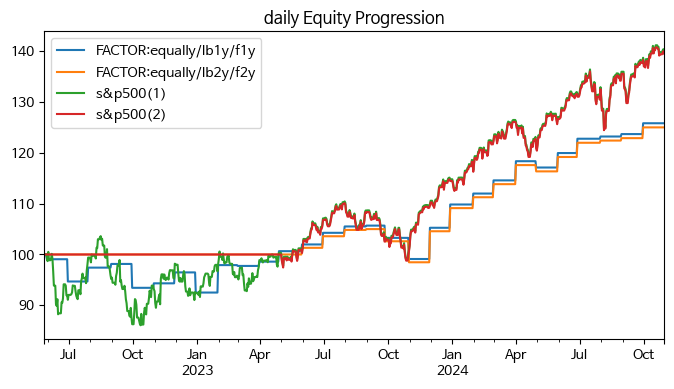

In [41]:
bm.run(stats_sort_by='cagr', figsize=(8,4))

### Momentum

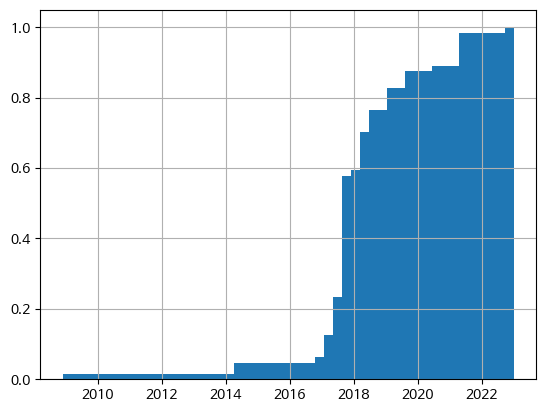

In [48]:
density=True
_ = fund.get_date_range()['start date'].hist(bins=50, density=density, cumulative=True)

In [49]:
df_train = df_tdf.loc['2018':]
len(df_train)

2496

In [14]:
#df_train.notna().sum(axis=1)

#### Cross-validate

In [50]:
from itertools import product

p_args = dict(
    p_n_tickers = [2, 4, 8],
    p_lookback = ['1y', '2y', '3y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'TDF:n{x[0]}/lb{x[1]}/f{x[1]}',
           'n_tickers':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]
params[0]

{'name': 'TDF:n2/lb1y/f1y', 'n_tickers': 2, 'lookback': '1y', 'freq': '1y'}

In [51]:
bm = BacktestManager(df_train, **kwargs_bm)

48 securities from 2018-01-01 to 2024-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [52]:
kwa_list = params
kwargs_build = dict(
    select='Momentum', weigh='Equally', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

9 jobs prepared for cross-validation


In [53]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=100, **kw_batch)

Cross-validating 9 strategies: TDF:n2/lb1y/f1y, TDF:n2/lb2y/f2y, ... , TDF:n8/lb3y/f3y


100%|███████████████████████████████████████████████████████████████| 89/89 [00:09<00:00,  9.12it/s]


1.5 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [54]:
file = 'param_tdf_s2.csv'

*Save param study*

In [55]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_tdf_s2.csv saved
9 param sets with 89 iterations per set


*Load param study*

In [56]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_tdf_s2.csv
9 param sets with 89 iterations per set


In [57]:
y = 'cagr'
ref_val = 's&p500'

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2018-01-02 to 2024-10-30


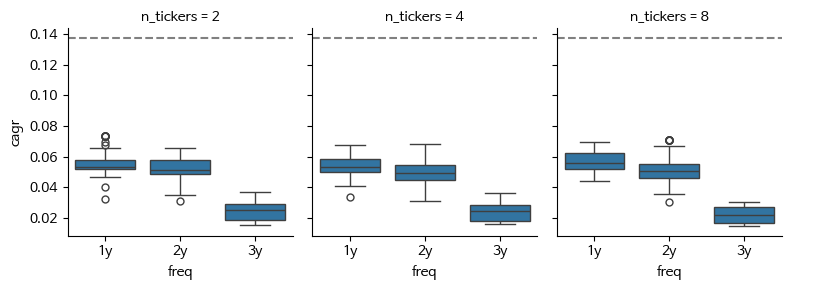

In [61]:
#kw = {'row':'lookback', 'col':'n_tickers', 'x':'freq', 'kind':'box'}
kw = {'col':'n_tickers', 'x':'freq', 'kind':'box'}
_ = bm.catplot(df_cv, ref_val=ref_val, y=y, height=3, aspect=.9, **kw)

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of s&p500 from 2018-01-02 to 2024-10-30


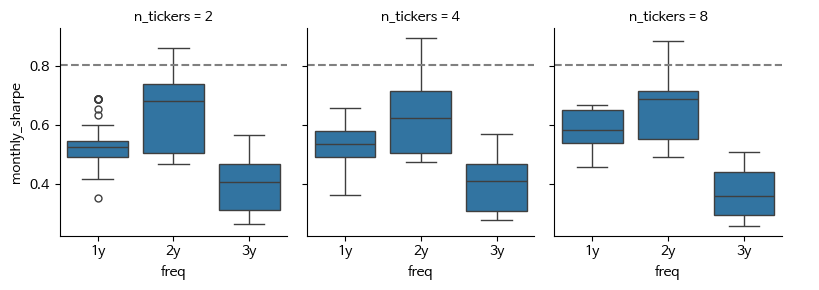

In [62]:
y = 'monthly_sharpe'
_ = bm.catplot(df_cv, ref_val=ref_val, y=y, height=3, aspect=.9, **kw)

#### Validation

In [63]:
df_val = df_train.iloc[-1000:]

In [65]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    days_in_year = 365,
    security_names = names_fund
)

In [66]:
bm = BacktestManager(df_val, **kwargs_bm)

48 securities from 2022-02-05 to 2024-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [67]:
# n, lookback
p_comb = [[8, '1y'], [8, '2y']]
kwa_list = [{'name':f'FACTOR:n{x[0]}/lb{x[1]}/f{x[1]}',
           'n_tickers':x[0], 'lookback':x[1], 'freq':x[1]} 
            for x in p_comb]

In [68]:
kwargs_build = dict(
    select='momentum', weigh='Equally'
)
bm.build_batch(*kwa_list, **kwargs_build)

In [69]:
#bm.benchmark(name='kodex200')
bm.benchmark(name='s&p500(1)', ticker='s&p500', lag='1y')
bm.benchmark(name='s&p500(2)', ticker='s&p500', lag='2y')

REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods


Backtesting 4 strategies: FACTOR:n8/lb1y/f1y, FACTOR:n8/lb2y/f2y, s&p500(1), s&p500(2)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 26.90it/s]


Returning stats


,s&p500(1),FACTOR:n8/lb1y/f1y,s&p500(2),FACTOR:n8/lb2y/f2y
start,2022-02-04,2022-02-04,2022-02-04,2022-02-04
end,2024-10-30,2024-10-30,2024-10-30,2024-10-30
total_return,0.41407,0.249438,0.176175,0.114229
cagr,0.135049,0.084827,0.061123,0.040338
calmar,1.314354,1.777745,0.720394,3.002804
max_drawdown,-0.102749,-0.047716,-0.084846,-0.013434
avg_drawdown,-0.014837,-0.019802,-0.012716,-0.013434
avg_drawdown_days,11.744186,49.0,9.5,31.0
daily_vol,0.099701,0.057111,0.065193,0.033194
daily_sharpe,1.324832,1.458663,0.945708,1.211691


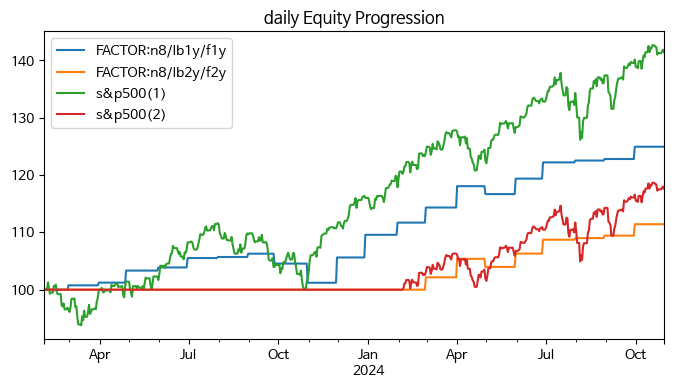

In [70]:
bm.run(stats_sort_by='cagr', figsize=(8,4))

### Min Weight

In [12]:
df_train = df_tdf.loc['2018':]
len(df_train)

2496

#### Cross-validate

In [13]:
from itertools import product

p_args = dict(
    p_w = ['erc', 'meanvar', 'invvol'],
    p_freq = ['6m', '1y', '2y'],
    p_wm = [0.1, 0.2, 0.3]
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'TDF:{x[0]}/lb{x[1]}/f{x[1]}/wm{x[2]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1], 'weight_min':x[2]} 
            for x in p_comb]
params[0]

{'name': 'TDF:erc/lb6m/f6m/wm0.1',
 'weigh': 'erc',
 'lookback': '6m',
 'freq': '6m',
 'weight_min': 0.1}

In [14]:
bm = BacktestManager(df_train, **kwargs_bm)

48 securities from 2018-01-01 to 2024-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [15]:
kwa_list = params
kwargs_build = dict(
    select='all', align_axis=None,
    reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

27 jobs prepared for cross-validation


In [17]:
bm.cross_validate(n_sample=100)

Cross-validating 27 strategies: TDF:erc/lb6m/f6m/wm0.1, TDF:erc/lb6m/f6m/wm0.2, ... , TDF:invvol/lb2y/f2y/wm0.3


100%|███████████████████████████████████████████████████████████████| 89/89 [00:04<00:00, 19.22it/s]


7.4 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [18]:
file = 'param_tdf_s3.csv'

*Save param study*

In [19]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

param_tdf_s3.csv saved
27 param sets with 89 iterations per set


*Load param study*

In [33]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_tdf_s1.csv
12 param sets with 83 iterations per set


In [20]:
y = 'cagr'
ref_val = 's&p500'

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2018-01-02 to 2024-10-30


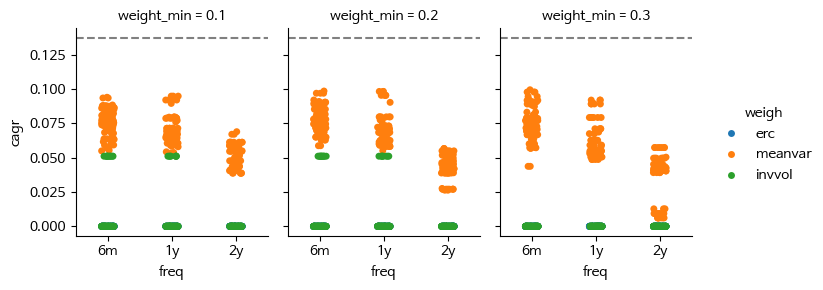

In [21]:
#kw = {'x':'freq', 'row':'weigh', 'col':'weight_min'} 
kw = {'x':'freq', 'hue':'weigh', 'col':'weight_min'} 

_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

[*********************100%***********************]  1 of 1 completed

Returning cagr of s&p500 from 2018-01-02 to 2024-10-30


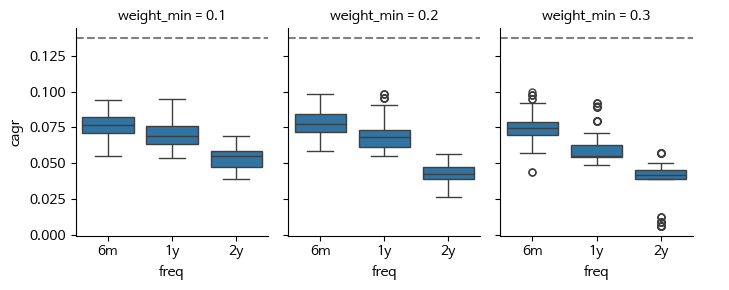

In [22]:
df = df_cv.loc[df_cv.weigh=='meanvar']

y = 'cagr'
kw = {'x':'freq', 'col':'weight_min', 'kind':'box'} 

_ = bm.catplot(data=df, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

[*********************100%***********************]  1 of 1 completed

Returning monthly_sharpe of s&p500 from 2018-01-02 to 2024-10-30


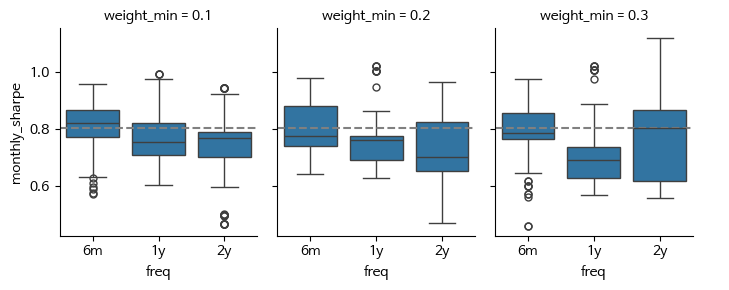

In [23]:
y = 'monthly_sharpe'
_ = bm.catplot(data=df, y=y, ref_val=ref_val, height=3, aspect=.8, **kw)

#### Validation

In [20]:
df_val = df_train.iloc[-500:]
bm = BacktestManager(df_val, **kwargs_bm)

48 securities from 2023-06-20 to 2024-10-31 uploaded.
running self.util_check_days_in_year to check days in a year


In [21]:
# weigh, freq, weight_min
p_comb = [['meanvar', '6m', 0.2], ['meanvar', '1y', 0.2]]
kwa_list = [{'name':f'TDF:{x[0]}/lb{x[1]}/f{x[1]}/wm{x[2]}',
           'weigh':x[0], 'lookback':x[1], 'freq':x[1], 'weight_min':x[2]} 
            for x in p_comb]

In [22]:
kwargs_build = dict(
    select='all', align_axis=None
)
bm.build_batch(*kwa_list, **kwargs_build)

In [23]:
#bm.benchmark_ticker(name='kodex200')
bm.benchmark(name='s&p500(1)', ticker='s&p500', lag='6m')
bm.benchmark(name='s&p500(2)', ticker='s&p500', lag='1y')

REMINDER: Make sure all strtategies built to align backtest periods
REMINDER: Make sure all strtategies built to align backtest periods


Backtesting 4 strategies: TDF:meanvar/lb6m/f6m/wm0.2, TDF:meanvar/lb1y/f1y/wm0.2, s&p500(1), s&p500(2)


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.36it/s]


Returning stats


,s&p500(1),TDF:meanvar/lb6m/f6m/wm0.2,s&p500(2),TDF:meanvar/lb1y/f1y/wm0.2
start,2023-06-19,2023-06-19,2023-06-19,2023-06-19
end,2024-10-30,2024-10-30,2024-10-30,2024-10-30
total_return,0.224693,0.18362,0.063841,0.044533
cagr,0.159933,0.131329,0.04634,0.032405
calmar,1.885385,5.94504,0.546406,28.111193
max_drawdown,-0.084828,-0.02209,-0.084809,-0.001153
avg_drawdown,-0.011785,-0.02209,-0.012586,-0.001153
avg_drawdown_days,8.321429,31.0,9.272727,31.0
daily_vol,0.096714,0.063102,0.072315,0.024775
daily_sharpe,1.579546,1.982804,0.661302,1.296797


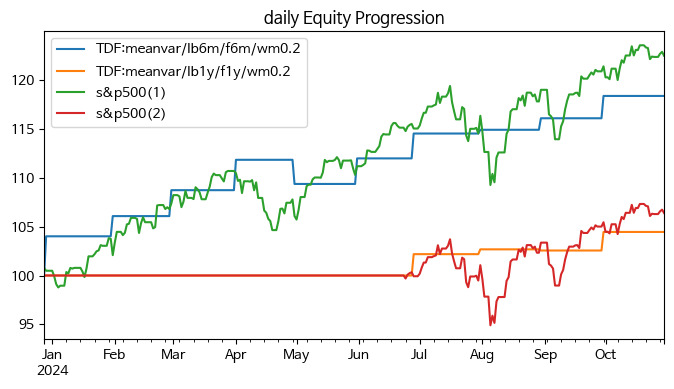

In [24]:
bm.run(stats_sort_by='cagr', figsize=(8,4))

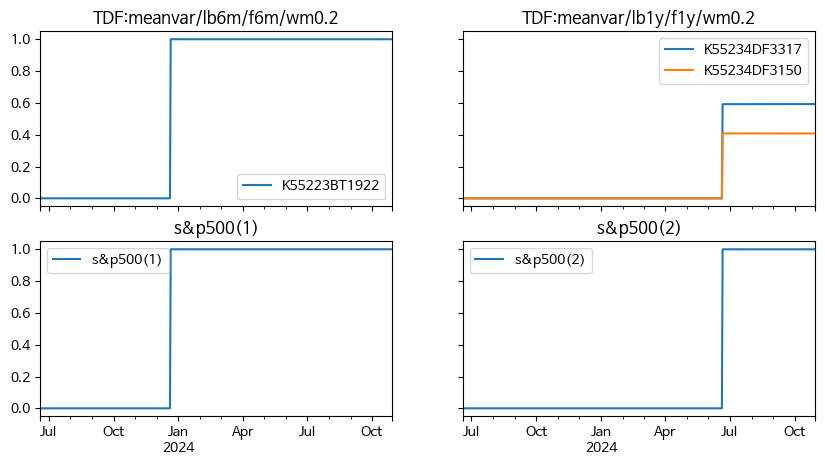

In [25]:
bm.plot_security_weights()

## HANA

In [75]:
hana.get_date_range()

,name,start date,end date,n
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),2010-01-29,2024-07-31,5298
KR5370AP9956,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce,2014-04-30,2024-07-31,3746
KR5236AS4826,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E,2014-05-30,2024-07-31,3716
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,2019-10-31,2024-07-31,1736


In [79]:
n_val = 260
n_lb = 0
df = df_hana
df_train = df.iloc[:-n_val]
df_val = df.iloc[-n_val-n_lb:]

In [80]:
kwargs_bm = dict(
    initial_capital = 1e7,
    commissions = 0,
    days_in_year = 365,
    security_names = names_hana
)

### Selected

In [14]:
hana.get_names()

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

#### Cross-validate

In [16]:
from itertools import product

p_args = dict(
    p_w = ['equally', 'erc', 'meanvar', 'invvol'],
    p_lookback = ['6m', '1y', '2y'],
    p_lag = [0],
    p_freq = ['6m', '1y']
)
p_comb = list(product(*p_args.values()))
params = [{'name':f'HANA:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]
params[0]

{'name': 'HANA:equally/lb6m/lg0/f6m',
 'weigh': 'equally',
 'lookback': '6m',
 'lag': 0,
 'freq': '6m'}

In [17]:
bm = BacktestManager(df_train, **kwargs_bm)

4 assets from 2010-01-29 to 2023-10-05 uploaded.
running self.util_check_days_in_year to check days in a year


In [19]:
kwa_list = params
kwargs_build = dict(
    select='all', reset_portfolios=True, build_cv=True
)
bm.build_batch(*kwa_list, **kwargs_build)

24 jobs prepared for cross-validation


In [20]:
kw_batch = dict(size_batch=0, path_batch=path_data)
bm.cross_validate(n_sample=100, **kw_batch)

Cross-validating 24 strategies: HANA:equally/lb6m/lg0/f6m, HANA:equally/lb6m/lg0/f1y, ... , HANA:invvol/lb2y/lg0/f1y


100%|███████████████████████████████████████████████████████████████| 19/19 [00:30<00:00,  1.60s/it]


12.9 mins elapsed, 0.0 secs paused (0.0%)


#### Visualize

In [15]:
file = 'param_hana_s1.csv'

*Save param study*

In [22]:
f = dict(file=file, path=path_data)
df_cv = bm.get_cat_data(params, **f)

data/param_hana_s1.csv saved
24 param sets with 19 iterations per set


*Load param study*

In [16]:
bm = BacktestManager
df_cv = bm.catplot(file, path=path_data)

Returning data/param_hana_s1.csv
24 param sets with 19 iterations per set


In [18]:
y = 'cagr'
ref_val = 's&p500'

In [19]:
#kw = {'row':'lookback', 'col':'freq', 'x':'weigh', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'hue':'lag'}
#kw = {'x':'lookback', 'col':'weigh', 'row':'freq', 'kind':'box'}
kw = {'x':'weigh', 'hue':'freq', 'col':'lookback', 'kind':'violin', 'split':True, 'inner':None}

Returning cagr of kospi from 2010-01-28 to 2023-10-05


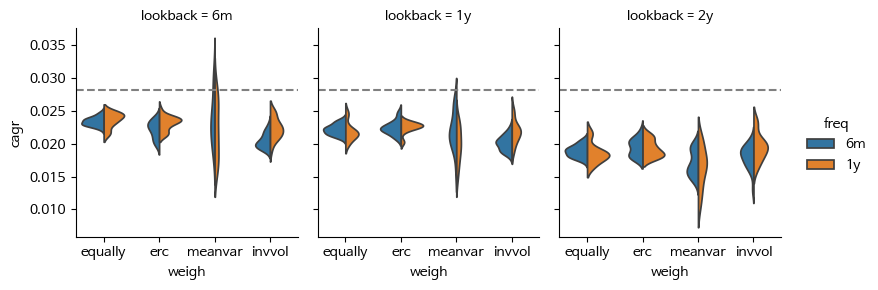

In [20]:
y = 'cagr'
ref_val = 'kospi' #'s&p500'
_ = bm.catplot(data=df_cv, y=y, ref_val=ref_val, height=3, aspect=.9, **kw)

#### Validation

In [32]:
bm = BacktestManager(df_val, **kwargs_bm)

bm.benchmark_ticker(name='kodex200')
bm.benchmark('s&p500')

4 assets from 2023-01-19 to 2024-07-31 uploaded.
running self.util_check_days_in_year to check days in a year
Benchmark is kodex200
ERROR: check arg dfs


In [33]:
# weigh, lookback, lag, freq
p_comb = [['meanvar', '6m', 0, '1y'], ['equally', '6m', 0, '1y'], ['equally', 0, 0, '1y']]
kwa_list = [{'name':f'HANA:{x[0]}/lb{x[1]}/lg{x[2]}/f{x[3]}',
           'weigh':x[0], 'lookback':x[1], 'lag':x[2], 'freq':x[3]} 
            for x in p_comb]

Backtesting 4 strategies: kodex200, HANA:meanvar/lb6m/lg0/f1y, HANA:equally/lb6m/lg0/f1y, HANA:equally/lb0/lg0/f1y


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.05it/s]


Returning stats


,kodex200,HANA:equally/lb0/lg0/f1y,HANA:equally/lb6m/lg0/f1y,HANA:meanvar/lb6m/lg0/f1y
start,2023-01-18,2023-01-18,2023-01-18,2023-01-18
end,2024-07-31,2024-07-31,2024-07-31,2024-07-31
total_return,0.246558,0.141851,0.105622,0.085868
cagr,0.154587,0.090372,0.067682,0.0552
calmar,1.224666,2.759825,1.972666,6.212704
max_drawdown,-0.126228,-0.032746,-0.03431,-0.008885
avg_drawdown,-0.027691,-0.011109,-0.018062,-0.006729
avg_drawdown_days,21.086957,42.2,40.666667,31.0
daily_vol,0.160916,0.057979,0.056311,0.035172
daily_sharpe,0.998316,1.562215,1.222921,1.58728


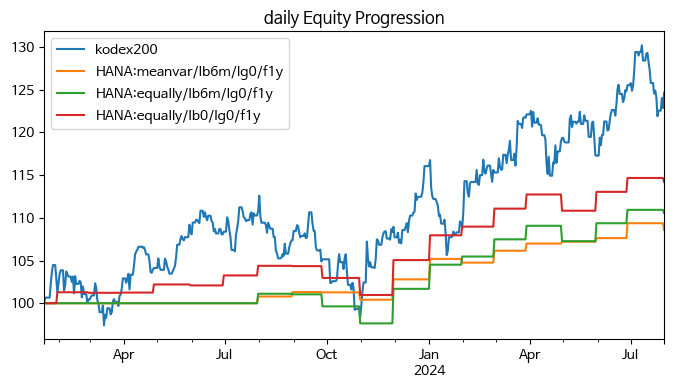

In [35]:
kwargs_build = dict(
    select='all'
)
bm.build_batch(*kwa_list, **kwargs_build)

bm.run(stats_sort_by='cagr', figsize=(8,4))